In [1]:
# Produced by: Kirubel Temesgen
# College ID: C00260396
# Description: To use linear aggression to predict the salaries in, medium sized Irish business sectors

# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Load the dataset

df = pd.read_csv('average-salary-index.csv')

In [ ]:
# Filter the dataset for companies with 50-250 employees
df_filtered = df[df['Size of Employees per Enterprise'] == '50 - 250']

In [ ]:
# Remove rows where the salary ('VALUE') is missing or 0, and drop any other missing data
df_filtered = df_filtered[df_filtered['VALUE'] > 0].dropna()

In [ ]:
#Convert categorical variables (like 'Economic Sector NACE Rev 2') into numerical (binary) columns using one-hot encoding
df_encoded = pd.get_dummies(df_filtered, columns=['Economic Sector NACE Rev 2'], drop_first=True)

In [ ]:
# Define (X) by excluding columns that are not helpful for predictions ('VALUE' is the target)
X = df_encoded.drop(columns=['VALUE', 'Statistic Label', 'UNIT', 'Quarter', 'Size of Employees per Enterprise'])
# Predictions are based on X (Economic Sector) (Y) is trained on actual values
y = df_encoded['VALUE']  

In [ ]:
# Split the data into trainin and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialise the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions based on the test data
y_pred = model.predict(X_test)


Mean Squared Error: 7852.642550312521
R² Score: 0.880475481878861


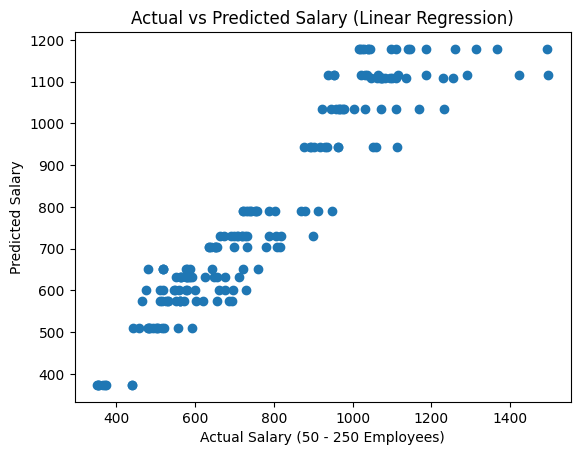

In [ ]:
# Calculate the Mean Squared Error (MSE) and R² Score to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the above metrics
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Create a scatter plot to compare actual vs predicted salary values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary (50 - 250 Employees)')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Linear Regression)')
plt.show()